In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounment/python-data-analyze/master/kaggle/score/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data = data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


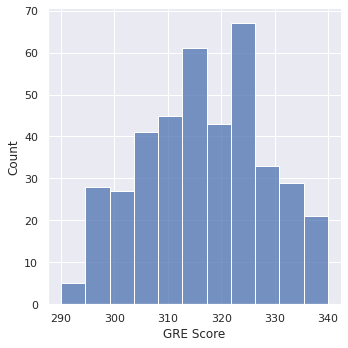

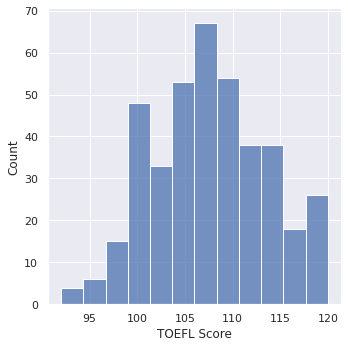

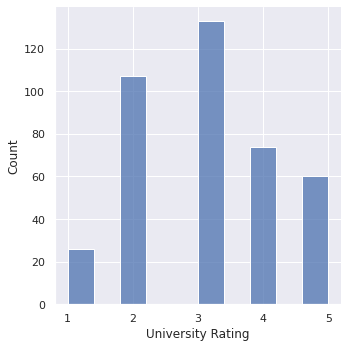

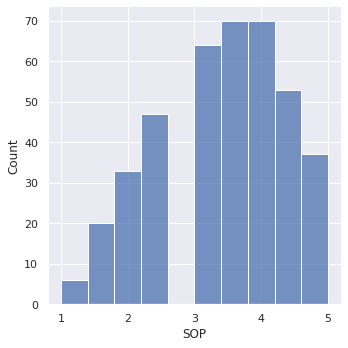

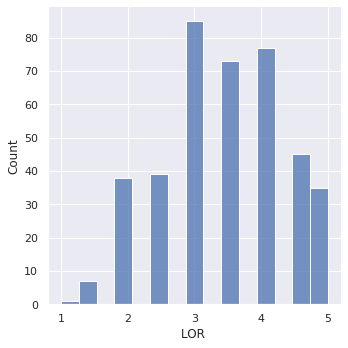

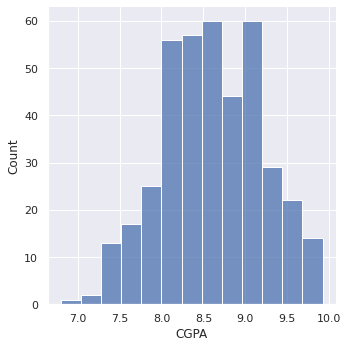

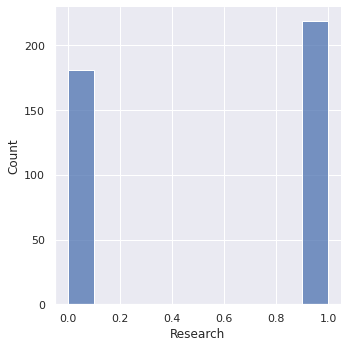

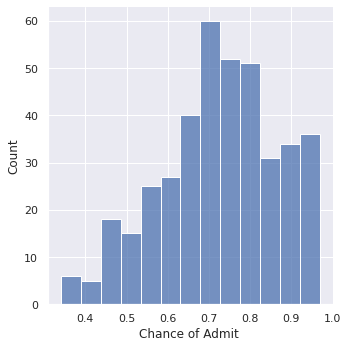

In [18]:
for column in data:
    sns.displot(data[column])

In [30]:
Y = data['Chance of Admit ']
X = data.drop(columns=['Chance of Admit '])

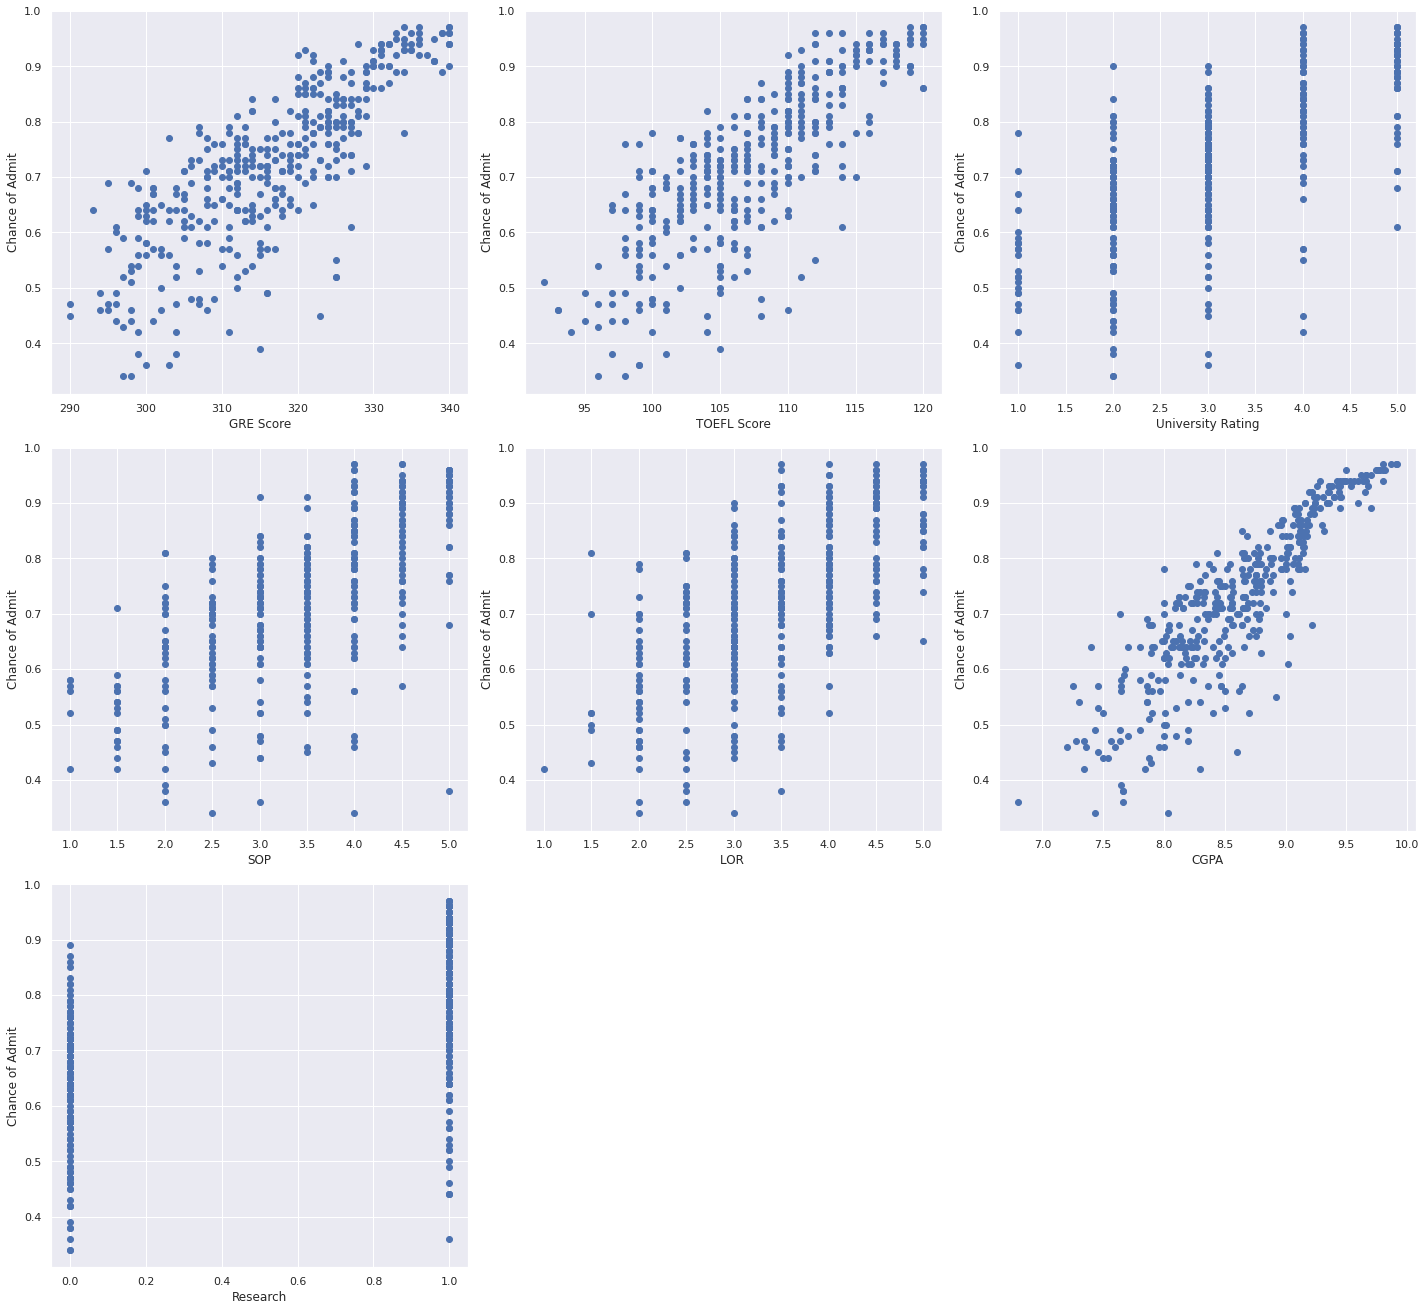

In [33]:
plt.figure(figsize = (20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
plt.tight_layout()

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled[0]

array([1.76210664, 1.74697064, 0.79882862, 1.09386422, 1.16732114,
       1.76481828, 0.90911166])

In [38]:
x_train, x_test,y_train, y_test = train_test_split(x_scaled, Y, test_size=0.25, random_state=355)

In [40]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [41]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [42]:
regression.intercept_

0.7297052007085544

In [43]:
regression.coef_

array([0.02718736, 0.01754128, 0.00652782, 0.0003921 , 0.01913762,
       0.06351017, 0.00911258])

In [44]:
regression.predict(scaler.transform([[300,110,5,5,5,10,1]]))

array([0.89957137])

In [46]:
filename = 'finalised_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [49]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[300,101,3,4,4,8,0]]))
a

array([0.6087995])

In [50]:
regression.score(x_train,y_train)

0.8284056016355628

In [51]:
regression.score(x_test,y_test)

0.7204585720546246